![assets/ForestFireCartoon.jpg](assets/ForestFireCartoon.jpg)

# Overview of Finetuning Project

The purpose of this series of notebooks on Finetuning is to experiment with using aerial photos as a basis for predicting forest fire likelyhood based on the Modis datasets using Google Earth Engine Modis data and USDA/NAIP/DOQQ aerial photos - all from within the State of California

For this workshop, however, in order to provide the data for the lab, we have provided sythetic data.

The discussion that follows in this notebookl, is from actual data from NAIP from 2016-2017 and the MODIS data is filtered to show the fires in CA from 2018 thru 2020.




# Sampling Method

I used the Modis datasets to identify which regions in CA had been burned in forest fires in the period from 2018 to 2020.

I then collected images from these same regions from the period 2016 to end of 2017 and used the pre-burn images from both known fire and non-fire regions to make a resnet 18 binary model to predict Fire or NoFire for a given image.

The sampling index map is displayed below for both the FIre and NoFire cases showing the locations we sampled with aerial photos

## Fire Samples
I sampled the MODIS regions by "human random" means to simply identify the ;attitudes and longitudes of Both Fire and NoFire regions. The MODIS burn area are the Red polygons, the cyan pins are my intended sample locations.

<img src="assets/CA Burn areas 2018 to 2021 sampled.png" width="800"/>

## NoFire Samples
I sampled the MODIS regions by "human random" means. The MODIS burn area are the Red polygons, the darker blue/teal pins are my intended sample locations

<img src="assets/CA No Burn areas 2018 to 2020 sampled.png" width="800"/>

# Plot Samples w MODIS

Hand drawn polygons approximating the MODIS fire region for Northern California from 2016 through 2017

In [1]:
import numpy as np
ModisOutlineParadise = np.load('ModisOutlineParadise.npy')
ModisOutlineNorth = np.load('ModisOutlineNorth.npy')
ModisOutlineWest = np.load('ModisOutlineWest.npy' )

# Function to test whether or no a given latitude, longitude is inside or outside the specified polygon

In [2]:
def point_in_polygon(point, polygon):
    x, y = point
    n = len(polygon)
    inside = False

    p1x, p1y = polygon[0]
    for i in range(n + 1):
        p2x, p2y = polygon[i % n]
        if y > min(p1y, p2y):
            if y <= max(p1y, p2y):
                if x <= max(p1x, p2x):
                    if p1y != p2y:
                        xints = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                    if p1x == p2x or x <= xints:
                        inside = not inside
        p1x, p1y = p2x, p2y

    return inside

## MODIS Regions Ideal Sampling

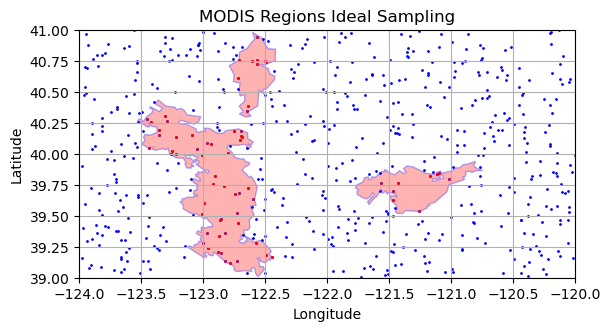

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from shapely.geometry import Polygon as GPoly

N_rnd = 600
np.random.seed(42)

polyP = Polygon(ModisOutlineParadise, closed=True,  fc=(1,0,0,0.3),  ec=(0,0,1,0.3))
polyW = Polygon(ModisOutlineWest,     closed=True,  fc=(1,0,0,0.3), ec=(0,0,1,0.3))
polyN = Polygon(ModisOutlineNorth,    closed=True,  fc=(1,0,0,0.3), ec=(0,0,1,0.3))

fig, ax = plt.subplots()

ax.add_patch(polyP)
ax.add_patch(polyN)
ax.add_patch(polyW)

# Plot the line segments joining the vertices

xp, yp = zip(*ModisOutlineParadise)
xw, yw = zip(*ModisOutlineWest)
xn, yn = zip(*ModisOutlineNorth)
xmin = min(min(xp),min(xw),min(xn))
xmax = max(max(xp),max(xw),max(xn))

ymin = min(min(yp),min(yw),min(yn))
ymax = max(max(yp),max(yw),max(yn))

xrnd = 4*np.random.sample(N_rnd) - 124
yrnd = 2*np.random.sample(N_rnd) + 39

# Color all points blue at first
Modis = np.vstack([ModisOutlineWest, ModisOutlineNorth, ModisOutlineParadise])
polyWG = GPoly(Modis)
prnd = np.array(list(zip(xrnd, yrnd)))
plt.scatter(xrnd, yrnd, s= 1, c='b')

# Color ModisOutlineWest points red
test = []
for point in prnd:
    test.append(point_in_polygon(point, ModisOutlineWest))
test = np.array(test)
plt.scatter(xrnd[test==True], yrnd[test==True], s= 1, c='r')

# Color ModisOutlineNorth points red
test = []
for point in prnd:
    test.append(point_in_polygon(point, ModisOutlineNorth))
test = np.array(test)
plt.scatter(xrnd[test==True], yrnd[test==True], s= 1, c='r')

# Color ModisOutlineParadise points red
test = []
for point in prnd:
    test.append(point_in_polygon(point, ModisOutlineParadise))
test = np.array(test)
plt.scatter(xrnd[test==True], yrnd[test==True], s= 1, c='r')


# Set the aspect ratio and limits
plt.gca().set_aspect('equal')
plt.xlim(-124, -120)
plt.ylim(39.0, 41.0)
plt.grid()
# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('MODIS Regions Ideal Sampling')
#s = [1+10*i for i in range(len(x))]

# Show the plot
plt.show()


## MODIS Regions actual Sampling

Number in Paradise 9
Number in West 48
Number in North 10
Number of Fire Samples 67


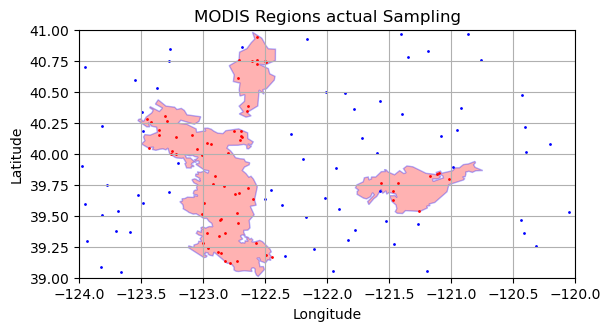

In [4]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from shapely.geometry import Polygon as GPoly
import random

fire = [coord for coord in prnd if point_in_polygon(coord, ModisOutlineParadise)]

polyP = Polygon(ModisOutlineParadise, closed=True,  fc=(1,0,0,0.3),  ec=(0,0,1,0.3))
polyW = Polygon(ModisOutlineWest,     closed=True,  fc=(1,0,0,0.3), ec=(0,0,1,0.3))
polyN = Polygon(ModisOutlineNorth,    closed=True,  fc=(1,0,0,0.3), ec=(0,0,1,0.3))

fig, ax = plt.subplots()

ax.add_patch(polyP)
ax.add_patch(polyN)
ax.add_patch(polyW)

NumFireSample = 0
fireP = [coord for coord in prnd if point_in_polygon(coord, ModisOutlineParadise)]
x,y = list(zip(*fireP))
print("Number in Paradise", len(fireP))
plt.scatter(x, y, s= 1, c='r')
NumFireSample += len(fireP)

fireW = [coord for coord in prnd if point_in_polygon(coord, ModisOutlineWest)]
x,y = list(zip(*fireW))
print("Number in West", len(fireW))
NumFireSample += len(fireW)
plt.scatter(x, y, s= 1, c='r')

fireN = [coord for coord in prnd if point_in_polygon(coord, ModisOutlineNorth)]
x,y = list(zip(*fireN))
print("Number in North", len(fireN))
NumFireSample += len(fireN)
plt.scatter(x, y, s= 1, c='r')
print("Number of Fire Samples", NumFireSample)

nofire = [coord for coord in prnd if 
                 (not point_in_polygon(coord, ModisOutlineParadise) 
                  and not point_in_polygon(coord, ModisOutlineWest) 
                  and not point_in_polygon(coord, ModisOutlineNorth))]

nofireSample = random.sample(nofire, NumFireSample)
#x,y = list(zip(*nofire))
x,y = list(zip(*nofireSample))
plt.scatter(x, y, s= 1, c='b')


# Set the aspect ratio and limits
plt.gca().set_aspect('equal')
plt.xlim(-124, -120)
plt.ylim(39.0, 41.0)
plt.grid()
# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('MODIS Regions actual Sampling')

# Show the plot
plt.show()


## Notices and Disclaimers

Intel technologies may require enabled hardware, software or service activation.

No product or component can be absolutely secure. 

Your costs and results may vary. 

© Intel Corporation. Intel, the Intel logo, and other Intel marks are trademarks of Intel Corporation or its subsidiaries. Other names and brands may be claimed as the property of others. 